In [3]:
from gurobipy import *

## Precision LP

In [17]:
S = [0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]

xe = range(1, 11)
ye = range(1, 11)

Email, S, xe, ye= multidict({i: [S[i], float(xe[i]), float(ye[i])] for i in range(10)})

In [18]:
model = Model('precision')

# Email variable
w = model.addVars(Email, lb=0.0, ub =1.0, vtype='C', name = 'Weight')
I = model.addVars(Email, lb=0.0, ub =1.0, vtype='B', name = 'Indication')
u = model.addVar(lb=0.0, ub =1.0, vtype='C', name = 'Sum_Indication')

# position field
Ixs = model.addVars(Email, vtype='B', name = 'Ixs-Var')
Ixl = model.addVars(Email, vtype='B', name = 'Ixl-Var')
Iys = model.addVars(Email, vtype='B', name = 'Iys-Var')
Iyl = model.addVars(Email, vtype='B', name = 'Iyl-Var')

xmin = model.addVar(lb=xe[0], ub=xe[9], vtype='I', name = 'Xmin')
xmax = model.addVar(lb=xe[0], ub=xe[9], vtype='I', name = 'Xmax')
ymin = model.addVar(lb=ye[0], ub=ye[9], vtype='I', name = 'Ymin')
ymax = model.addVar(lb=ye[0], ub=ye[9], vtype='I', name = 'Ymax')

In [19]:
# Weight-Sum constraints
model.addConstr(quicksum(w[i] for i in range(10)) == 1.0, 'Sum(w[i]) == 1.0')

for i in Email:
    model.addConstr(w[i] <= u, 'w[i] <= u')
    model.addConstr(w[i] <= 1e4*I[i], 'w[i] <= M*I(i)')
    model.addConstr(w[i] >= u-1e4*(1-I[i]),'w[i] >= u - M*[1-I(i)]')
    model.addConstr(w[i] >= 0.0, 'Weight-positive')
    
    model.addGenConstrAnd(I[i], [Ixs[i], Ixl[i], Iys[i], Iyl[i]], "PosCon")
    
    model.addConstr(xmin <= xmax, 'xmin <= xmax')
    model.addConstr(ymin <= ymax, 'ymin <= xmax')
    
    model.addGenConstrIndicator(Ixs[i], True, xmin-xe[i] <= 0.0)
    model.addGenConstrIndicator(Ixl[i], True, xe[i]-xmax <= 0.0)
    model.addGenConstrIndicator(Iys[i], True, ymin-ye[i] <= 0.0)
    model.addGenConstrIndicator(Iyl[i], True, ye[i]-ymax <= 0.0)
    
    model.addGenConstrIndicator(Ixs[i], False, xmin-xe[i] >= 0.0001)
    model.addGenConstrIndicator(Ixl[i], False, xe[i]-xmax >= 0.0001)
    model.addGenConstrIndicator(Iys[i], False, ymin-ye[i] >= 0.0001)
    model.addGenConstrIndicator(Iyl[i], False, ye[i]-ymax >= 0.0001)

model.setObjective(w.prod(S), GRB.MAXIMIZE)
    
model.optimize()

#if model.Status == GRB.OPTIMAL:
#    print(z.X)
print('===================')
for v in model.getVars():
    print(v.varName, v.x)
print('===================')
print('Obj:', model.objVal)


Optimize a model with 61 rows, 65 columns and 130 nonzeros
Model has 90 general constraints
Variable types: 11 continuous, 54 integer (50 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+01]
  RHS range        [1e+00, 1e+04]
Presolve removed 36 rows and 8 columns
Presolve time: 0.00s
Presolved: 195 rows, 177 columns, 438 nonzeros
Presolved model has 76 SOS constraint(s)
Variable types: 87 continuous, 90 integer (86 binary)
Found heuristic solution: objective -0.0000000

Root relaxation: objective 1.000000e+00, 103 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.00000    0   18   -0.00000    1.00000      -     -    0s
     0     2    1.00000    0   18   -0.00000    1.00000      -     -    0s
H   90    22                       0.6250000    1.00000  60.0%   1.4    

## Recall LP

In [20]:
S = [0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
u = 1/sum(S)

xe = range(1, 11)
ye = range(1, 11)

Email, S, xe, ye= multidict({i: [S[i], float(xe[i]), float(ye[i])] for i in range(10)})

In [21]:
model = Model('Recall')

# Email variable
w = model.addVars(Email, lb=0.0, ub =1.0, vtype='C', name = 'Weight')
I = model.addVars(Email, lb=0.0, ub =1.0, vtype='B', name = 'Indication')

# position field

Ixs = model.addVars(Email, vtype='B', name = 'Ixs-Var')
Ixl = model.addVars(Email, vtype='B', name = 'Ixl-Var')
Iys = model.addVars(Email, vtype='B', name = 'Iys-Var')
Iyl = model.addVars(Email, vtype='B', name = 'Iyl-Var')

xmin = model.addVar(lb=xe[0], ub=xe[9], vtype='I', name = 'Xmin')
xmax = model.addVar(lb=xe[0], ub=xe[9], vtype='I', name = 'Xmax')
ymin = model.addVar(lb=ye[0], ub=ye[9], vtype='I', name = 'Ymin')
ymax = model.addVar(lb=ye[0], ub=ye[9], vtype='I', name = 'Ymax')

In [22]:
# Position constraints
for i in Email:
    
    model.addConstr(w[i] <= u, 'w[i] <= u')
    model.addConstr(w[i] <= 1e4*I[i], 'w[i] <= M*I(i)')
    model.addConstr(w[i] >= u-1e4*(1-I[i]),'w[i] >= u - M*[1-I(i)]')
    model.addConstr(w[i] >= 0.0, 'Weight-positive')
    
    #model.addGenConstrIndicator(z[i], True, y[i] >= weightMin)
    model.addGenConstrAnd(I[i], [Ixs[i], Ixl[i], Iys[i], Iyl[i]], "PosCon")
    
    model.addConstr(xmin <= xmax, 'xmin <= xmax')
    model.addConstr(ymin <= ymax, 'ymin <= xmax')
    
    model.addGenConstrIndicator(Ixs[i], True, xmin-xe[i] <= 0.0)
    model.addGenConstrIndicator(Ixl[i], True, xe[i]-xmax <= 0.0)
    model.addGenConstrIndicator(Iys[i], True, ymin-ye[i] <= 0.0)
    model.addGenConstrIndicator(Iyl[i], True, ye[i]-ymax <= 0.0)
    
    model.addGenConstrIndicator(Ixs[i], False, xmin-xe[i] >= 0.0001)
    model.addGenConstrIndicator(Ixl[i], False, xe[i]-xmax >= 0.0001)
    model.addGenConstrIndicator(Iys[i], False, ymin-ye[i] >= 0.0001)
    model.addGenConstrIndicator(Iyl[i], False, ye[i]-ymax >= 0.0001)

model.setObjective(w.prod(S), GRB.MAXIMIZE)
    
model.optimize()

#if model.Status == GRB.OPTIMAL:
#    print(z.X)
print('===================')
for v in model.getVars():
    print(v.varName, v.x)
print('===================')
print('Obj:', model.objVal)

Optimize a model with 60 rows, 64 columns and 100 nonzeros
Model has 90 general constraints
Variable types: 10 continuous, 54 integer (50 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+01]
  RHS range        [2e-01, 1e+04]
Presolve removed 66 rows and 18 columns
Presolve time: 0.00s
Presolved: 164 rows, 166 columns, 358 nonzeros
Presolved model has 76 SOS constraint(s)
Variable types: 76 continuous, 90 integer (86 binary)
Found heuristic solution: objective -0.0000000

Root relaxation: objective 1.000000e+00, 83 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.00000    0   17   -0.00000    1.00000      -     -    0s
     0     2    1.00000    0   17   -0.00000    1.00000      -     -    0s
H   33    30                       0.4000000    1.00000   150%   1.5    

## F1 - Score LP

In [23]:
import matplotlib.pyplot as plt

S = [1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0]
C = sum(S)

xe = [1.0, 1.0, 2.0, 1.0, 2.0, 3.0, 4.0, 3.0, 4.0, 5.0]
ye = [1.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0]

Email, S, xe, ye= multidict({i: [S[i], float(xe[i]), float(ye[i])] for i in range(10)})

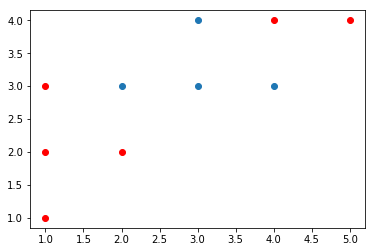

In [24]:
onesX = []
onesY = []
zerosX = []
zerosY = []

for e in Email:
    if(S[e]==1.0):
        onesX.append(xe[e])
        onesY.append(ye[e])
    elif(S[e]==0.0):
        zerosX.append(xe[e])
        zerosY.append(ye[e])

plt.plot(onesX,onesY,"ro")
plt.plot(zerosX,zerosY,"o")
plt.show()

In [25]:
model = Model('f1')

# Email variable
w = model.addVars(Email, lb=0.0, ub =1.0, vtype='C', name = 'Weight')
I = model.addVars(Email, lb=0.0, ub =1.0, vtype='B', name = 'Indication')
u = model.addVar(lb=0.0, ub =1.0, vtype='C', name = 'Sum_Indication')

# position field

Ixs = model.addVars(Email, vtype='B', name = 'Ixs-Var')
Ixl = model.addVars(Email, vtype='B', name = 'Ixl-Var')
Iys = model.addVars(Email, vtype='B', name = 'Iys-Var')
Iyl = model.addVars(Email, vtype='B', name = 'Iyl-Var')

xmin = model.addVar(lb=xe[0], ub=xe[9], vtype='I', name = 'Xmin')
xmax = model.addVar(lb=xe[0], ub=xe[9], vtype='I', name = 'Xmax')
ymin = model.addVar(lb=ye[0], ub=ye[9], vtype='I', name = 'Ymin')
ymax = model.addVar(lb=ye[0], ub=ye[9], vtype='I', name = 'Ymax')

In [26]:
model.addConstr(quicksum(w[i] for i in range(10))+u*C == 1.0, 'sum(w)+uC=1')

for i in Email:
    model.addConstr(w[i] <= u, 'w[i] <= u')
    model.addConstr(w[i] <= 1e4*I[i], 'w[i] <= M*I(i)')
    model.addConstr(w[i] >= u-1e4*(1-I[i]),'w[i] >= u - M*[1-I(i)]')
    model.addConstr(w[i] >= 0.0, 'Weight-positive')
    
    #model.addConstr(y[i] >= 0.0, 'Weight-positive')
    
    model.addGenConstrAnd(I[i], [Ixs[i], Ixl[i], Iys[i], Iyl[i]], "PosCon")
    
    model.addConstr(xmin <= xmax, 'xmin <= xmax')
    model.addConstr(ymin <= ymax, 'ymin <= xmax')
    
    model.addGenConstrIndicator(Ixs[i], True, xmin-xe[i] <= 0.0)
    model.addGenConstrIndicator(Ixl[i], True, xe[i]-xmax <= 0.0)
    model.addGenConstrIndicator(Iys[i], True, ymin-ye[i] <= 0.0)
    model.addGenConstrIndicator(Iyl[i], True, ye[i]-ymax <= 0.0)
    
    model.addGenConstrIndicator(Ixs[i], False, xmin-xe[i] >= 1)
    model.addGenConstrIndicator(Ixl[i], False, xe[i]-xmax >= 1)
    model.addGenConstrIndicator(Iys[i], False, ymin-ye[i] >= 1)
    model.addGenConstrIndicator(Iyl[i], False, ye[i]-ymax >= 1)

#model.write("soft-f1.mps")
#model.write("soft-f1.lp")

model.setObjective(w.prod(S), GRB.MAXIMIZE)

model.optimize()
                 
for v in model.getVars():
    print(v.varName, v.x)
boxX = [xmin.x, xmax.x, xmin.x, xmax.x]
boxY = [ymin.x, ymin.x, ymax.x, ymax.x]

Optimize a model with 61 rows, 65 columns and 131 nonzeros
Model has 90 general constraints
Variable types: 11 continuous, 54 integer (50 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 5e+00]
  RHS range        [1e+00, 1e+04]
Presolve removed 60 rows and 32 columns
Presolve time: 0.00s
Presolved: 171 rows, 153 columns, 383 nonzeros
Presolved model has 64 SOS constraint(s)
Variable types: 75 continuous, 78 integer (74 binary)
Found heuristic solution: objective -0.0000000
Found heuristic solution: objective 0.3750000

Root relaxation: objective 5.000000e-01, 95 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.50000    0   64    0.37500    0.50000  33.3%     -    0s
     0     0    0.50000    0   55    0.37500    0.50000  33.3%     -    0s
     0     0    0.50000   

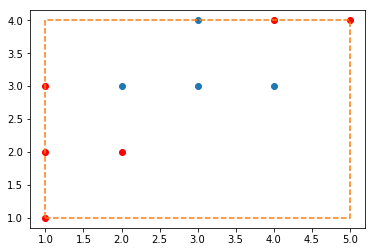

In [27]:
boxX = [xmin.x, xmax.x, xmax.x, xmin.x, xmin.x]
boxY = [ymin.x, ymin.x, ymax.x, ymax.x, ymin.x]
plt.plot(onesX,onesY,"ro")
plt.plot(zerosX,zerosY,"o")
plt.plot(boxX, boxY, "--")
plt.show()